In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display

In [2]:
train=pd.read_csv(r'G:/Documents/Facebook bid/data/train.csv')
test=pd.read_csv(r'G:/Documents/Facebook bid/data/test.csv')
bids=pd.read_csv(r'G:/Documents/Facebook bid/data/bids.csv')

In [3]:
train.head(5)

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [4]:
print(train.describe())
print(train.info())

           outcome
count  2013.000000
mean      0.051167
std       0.220394
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
None


In [5]:
bids.head(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [17]:
print(bids.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
None


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 110.2+ KB


# 异常数据检测

In [6]:
# 查看各表格中是否存在空值
print('Is there missing values in bids: ',bids.isnull().any().any())
print('Is there missing values in train:',train.isnull().any().any())
print('Is there missing values in test:',test.isnull().any().any())

Is there missing values in bids:  True
Is there missing values in train: False
Is there missing values in test: False


整个对三个数据集进行空值判断，发现用户数据训练集和测试集均无缺失数据，而在竞标行为数据集中存在缺失值的情况，下面便针对bids数据进一步寻找缺失值

#### 快捷键：Esc+m：把cell切换成markdown模式；Esc+y：把cell切换成code模式；A：向上建立一个cell；B：向下建立一个cell；Esc+2：设为2级标题；Esc+o:收起或打开cell；enter：进入编辑状态

##### 查看bids中country缺失值的情况

In [8]:
# nan_rows=bids[bids.isnull().T.any().T]
# print(nan_rows)

pd.isnull(bids).any()

bid_id         False
bidder_id      False
auction        False
merchandise    False
device         False
time           False
country         True
ip             False
url            False
dtype: bool

由此可知：在bids数据集中country存在缺失值

In [11]:
# bids中country缺失值的数量
missing_country=bids['country'].isnull().sum()
print('No. of missing country:',missing_country)
# bids中country有正常值得数量
normal_country=bids['country'].notnull().sum()
print('No. of normal country:',normal_country)

No. of missing country: 8859
No. of normal country: 7647475


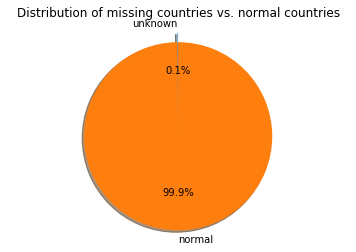

In [12]:
import matplotlib.pyplot as plt
labels=['unknown','normal']
sizes=[missing_country,normal_country]
explode=(0.1,0)
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of missing countries vs. normal countries')
plt.show()

综合上述的分析可以发现，在竞标行为用户的country一栏属性中存在很少一部分用户行为是没有country记录的，在预处理部分可以针对这部分缺失数据进行填充操作，有两种思路：
1、针对原始行为数据按照用户分组后，看看每个对应的用户竞标时经常所位于的国家信息，对缺失值填充常驻国家。
2、针对原始行为数据按照用户分组后，按时间顺序对每组用户中的缺失值前向或后向填充相邻的国家信息

##### 查看数据中id是否是唯一标识

In [20]:
# shape的功能是读取矩阵的长度；shape[0]:读取矩阵第一维度的长度。
print(bids.shape[0])
print(len(bids['bid_id'].unique()))
print(len(bids['bidder_id'].unique()))
print(train.shape[0])
print(len(train['bidder_id'].unique()))
print(test.shape[0])
print(len(test['bidder_id'].unique()))

7656334
7656334
6614
2013
2013
4700
4700


有上述可知：train中bidder+test中bidder>bids中的bidder--->接下来验证下竞标行为数据中的用户是否完全来自训练集和测试集；而且bids中的出价人进行了多次出价

In [24]:
# 对bids中的数据进行简单的统计
print('total bidder in bids', len(bids['bidder_id'].unique()))
print('total auction in bids',len(bids['auction'].unique()))
print('total merchandise in bids: ', len(bids['merchandise'].unique()))
print('total device in bids: ', len(bids['device'].unique())) 
print('total country in bids: ', len(bids['country'].unique())) 
print('total ip in bids: ', len(bids['ip'].unique())) 
print('total url in bids: ', len(bids['url'].unique()))

total bidder in bids 6614
total auction in bids 15051
total merchandise in bids:  10
total device in bids:  7351
total country in bids:  200
total ip in bids:  2303991
total url in bids:  1786351


商品类别和国家的种类相对其他特征较少，可以作为天然的类别特征提取出来进行处理，而其余的特征可能更多的进行计数统计

#### 判断bids中的bidder是否完全来自于train和test中？

In [28]:
all_user=(train['bidder_id'].unique()).tolist()+(test['bidder_id'].unique()).tolist()
print('total bidders of train and test set:',len(all_user))
bids_user=bids['bidder_id'].unique().tolist()
print('total bidders of bids set:',len(bids_user))
print('Is bidders in bids are all from train+test set?',set(bids_user).issubset(set(all_user)))
# tolist()将数组或矩阵转化为列表
# unique():去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或列表

total bidders of train and test set: 6713
total bidders of bids set: 6614
Is bidders in bids are all from train+test set? True


a=unique（A）返回的是无重复的元组或列表；a,s=np.unique(b,return_index=True):return_index=True表示返回新列表元素在旧列表中的位置，并以列表形式存储在s中(注意：在a中保存的是无重复的元组或列表，在s中保存的是a中元素在b中想对应的位置)

#### 判断train和test中的bidder分别有多少不存在于bids中 ？

In [32]:
nobids=[i for i in all_user if i not in bids_user] #判断train和test中无出价记录的bidder
print('No. of bidders never bid:',len(nobids))
nobids_train=[i for i in nobids if i in (train['bidder_id'].unique()).tolist()]
# 判断train中无出价记录的bidder
nobids_test=[i for i in nobids if i in (test['bidder_id'].unique()).tolist()]
# 判断test中无出价记录的bidder
print('No. of bidders never bid in train set:',len(nobids_train))
print('No. of bidders never bid in test set:', len(nobids_test))

No. of bidders never bid: 99
No. of bidders never bid in train set: 29
No. of bidders never bid in test set: 70


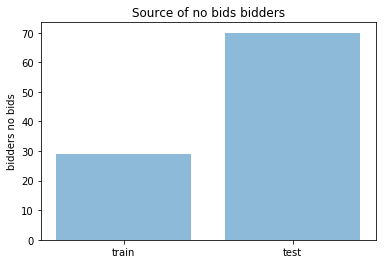

In [33]:
data_source = ['train', 'test']
y_pos = np.arange(len(data_source))
num_never_bids = [len(nobids_train), len(nobids_test)]
plt.bar(y_pos, num_never_bids, align='center', alpha=0.5)
plt.xticks(y_pos, data_source)
plt.ylabel('bidders no bids')
plt.title('Source of no bids bidders')
plt.show()

In [34]:
print(train[(train['bidder_id'].isin(nobids_train))&(train['outcome']==1.0)])
# 判断在train中无出价记录的bidder是否被标记为人类

Empty DataFrame
Columns: [bidder_id, payment_account, address, outcome]
Index: []


由上述计算可知存在99个竞标者无竞标记录，其中29位来自训练集，70位来自测试集，而且这29位来自训练集的竞标者未被标记为机器人用户，所以可以针对测试集中的这70位用户后续标记为人类或者取平均值处理

#### 判断train中bidder被标记为机器人和人类的个数？

In [45]:
# 检查在train中机器人的比例  outcome=1是机器人，outcome=0是人类
print ((train[train['outcome'] == 1].shape[0]*1.0) / train.shape[0] * 100,'%')

5.116741182314953 %


训练集中的标记为机器人的用户占所有用户数目约5%

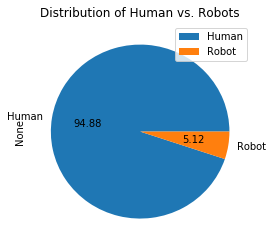

In [46]:
train.groupby('outcome').size().plot(labels=['Human', 'Robot'], kind='pie', autopct='%.2f', figsize=(4, 4), 
title='Distribution of Human vs. Robots', legend=True)
plt.show()

由上述训练集中的正负例分布可以看到本数据集正负例比例失衡，所以后续考虑使用AUC（不受正负例比例影响）作为评价指标，此外尽量采用Gradient Boosting族模型来进行训练